### Análisis descriptivo exploratorio

#### **1. Importación de Librerías**

In [1]:
##Cargar librerías de base pip install nombrelibreria - terminal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **2. Funciones**

In [36]:
### Función cargar data sea .csv o .xlsx
def importDatos(ruta, archivo, ext):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión Diferente')

## Función para datos NAN -> Null -> 0 (IRQ) -> NAN
def datos_NAN(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimesiones: %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total de Valores NAN: %d" % (total_na))
        print("%40s %10s  %10s %10s" % ("Nombre Columna", "Tipo Dato", "#Unicos", "Cant Valores NAN"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%40s %10s  %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
    else:
        print("Se esperaba un dataframe: %15s" % (type(df)))

## Numérico = Media o Mediana (NAN) - Histograma(Numerica) - Mediana - Forma de Campana(Media)
## Categórico o Texto = Moda (Valor mas se repite) // SMOTE (Genera data sintética)
def histoplot(df, nomCol, anchoBar):
    sns.histplot(data=df, x=nomCol, binwidth=anchoBar, kde=True)

##Función para Imputación de datos NAN con la media o mediana
def imputacionNA(df, nomCol, param):
    if param == 'media':
        df[nomCol]= df[nomCol].fillna(df[nomCol].mean())
        return df[nomCol]
    else:
        df[nomCol]= df[nomCol].fillna(df[nomCol].median())
        return df[nomCol]

## Función para revisar datos Categóricos
def revCategoricos(df, nomCol):
    rev = df[nomCol].value_counts()
    return rev

##Función de reemplazo con base en patrón
def imputCat(df, nomCol, busqueda, reempl):
    df[nomCol] = np.where(df[nomCol]== busqueda, reempl, df[nomCol])
    return df[nomCol]

##FUncion reemplazo de datos categóricos NAN
def imputacionCatNA(df, nomCol):
    df[nomCol] = df[nomCol].fillna(df[nomCol].mode()[0])
    return df[nomCol]





#### **3. Llamado a Funciones**

In [10]:
data = importDatos('./Datasets/', 'CovidDiagnosis', '.xlsx')

data.head()

,Age,Gender,Temperature,Headache,Fever,Hospital,CovidDiagnosis
0,12.0,Masculino,36°,SI,1.0,Moncaleano,positive
1,35.0,Femenino,38,NO,0.0,Medilaser,negative
2,65.0,NaN,36C,YES,1.0,Carmen Emilia,negative
3,78.0,NaN,39,NOP,1.0,Moncaleano,negative
4,41.0,Masculino,40.,SI,0.0,Medilaser,positive


In [14]:
## Revisión de datos NAN
datos_NAN(data)

Dimesiones: 99 filas, 7 columnas
Total de Valores NAN: 49
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                     Age    float64          46          3
                                  Gender     object           6          3
                             Temperature     object          30          1
                                Headache     object           6         35
                                   Fever    float64           2          7
                                Hospital     object           3          0
                          CovidDiagnosis     object           2          0


Dimesiones: 99 filas, 7 columnas
Total de Valores NAN: 46
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                     Age    float64          46          0
                                  Gender     object           6          3
                             Temperature     object          30          1
                                Headache     object           6         35
                                   Fever    float64           2          7
                                Hospital     object           3          0
                          CovidDiagnosis     object           2          0


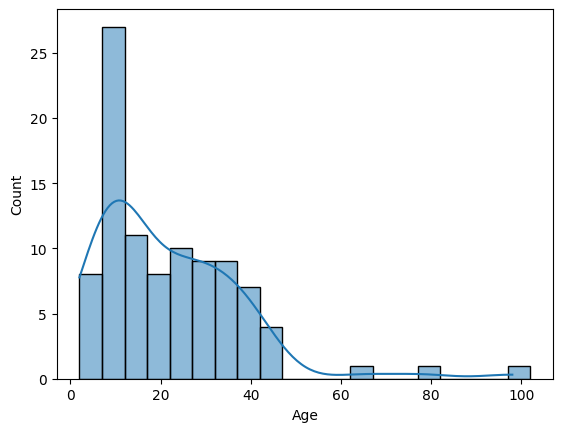

In [23]:
histoplot(data, 'Age', 5) # Reemplazan los datos NAN con la mediana

data['Age'] = imputacionNA(data, 'Age', 'mediana')

datos_NAN(data)

Dimesiones: 99 filas, 7 columnas
Total de Valores NAN: 39
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                     Age    float64          46          0
                                  Gender     object           6          3
                             Temperature     object          30          1
                                Headache     object           6         35
                                   Fever    float64           2          0
                                Hospital     object           3          0
                          CovidDiagnosis     object           2          0


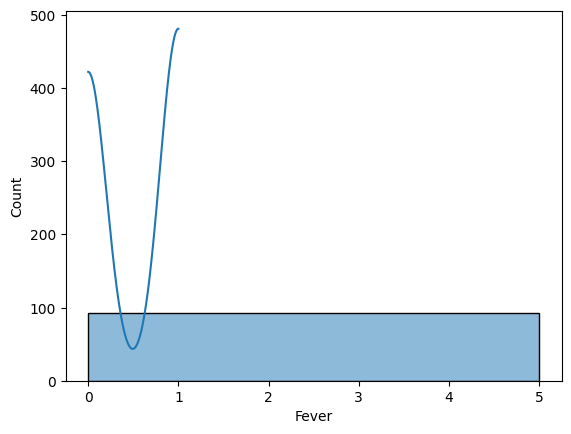

In [24]:
histoplot(data, 'Fever', 5)

data['Fever'] = imputacionNA(data, 'Fever', 'mediana')

datos_NAN(data)

In [32]:
## Revisión de datos categóricos
revCategoricos(data, 'Gender')

data['Gender'] = imputCat(data, 'Gender','Masculinoooo','Masculino')
data['Gender'] = imputCat(data, 'Gender','femenino','Femenino')
data['Gender'] = imputCat(data, 'Gender','Masculino…..//','Masculino')
data['Gender'] = imputCat(data, 'Gender','masculino','Masculino')

revCategoricos(data, 'Gender')

Femenino     65
Masculino    31
Name: Gender, dtype: int64

In [34]:
revCategoricos(data, 'Headache')

data['Headache'] = imputCat(data, 'Headache','NOP','NO')
data['Headache'] = imputCat(data, 'Headache','YES','SI')
data['Headache'] = imputCat(data, 'Headache','SI ','SI')
data['Headache'] = imputCat(data, 'Headache','OUI','SI')

revCategoricos(data, 'Headache')

SI    36
NO    28
Name: Headache, dtype: int64

In [37]:
data['Gender'] = imputacionCatNA(data, 'Gender')
data['Headache'] = imputacionCatNA(data, 'Headache')

datos_NAN(data)

Dimesiones: 99 filas, 7 columnas
Total de Valores NAN: 1
                          Nombre Columna  Tipo Dato     #Unicos Cant Valores NAN
                                     Age    float64          46          0
                                  Gender     object           2          0
                             Temperature     object          30          1
                                Headache     object           2          0
                                   Fever    float64           2          0
                                Hospital     object           3          0
                          CovidDiagnosis     object           2          0
